In [1]:
%autosave 0
%matplotlib inline

Autosave disabled


# sunekutools.classifier

In [2]:
from sunekutools import hello
from sunekutools.classifier import LogisticClassifier, traintest

In [3]:
hello(LogisticClassifier)

type

    Classify rows of a matrix into one of several categories.
    Return a DataFrame with category and probability for each row.

    Initialize using training data with known categories.
    Pre-processing and learning are automatic.
    Call with new data to classify each row.

    Input
        data    any valid DataFrame input: Training data.
        target  string or int: Name of column with known classes.
        **kwargs are passed to scikit-learn model.
    


## demo

In [4]:
hello(LogisticClassifier.demo)

method

        LogisticClassifier: Example with pre-loaded data.
        Uses Fisher's iris dataset from scikit-learn.
        


In [5]:
demo = LogisticClassifier.demo()
print(demo)

LogisticClassifier
target  : species
samples : 150
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


In [6]:
demo.data.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## partition rows into training and testing

In [7]:
training,testing = traintest(demo.data,0.33)
training.sample(5)

49 training rows
101 testing rows


,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
90,versicolor,5.5,2.6,4.4,1.2
35,setosa,5.0,3.2,1.2,0.2
106,virginica,4.9,2.5,4.5,1.7
39,setosa,5.1,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2


## build a LogisticClassifier
Pre-processing and learning are automatic.

In [8]:
params = {'penalty':'l1','solver':'liblinear'}
logclass = LogisticClassifier(training,'species',**params)
print(logclass)

LogisticClassifier
target  : species
samples : 49
model   : LogisticRegressionCV
features:
  sepal length (cm)
  sepal width (cm)
  petal length (cm)
  petal width (cm)
classes :
  setosa
  versicolor
  virginica


## inspect data

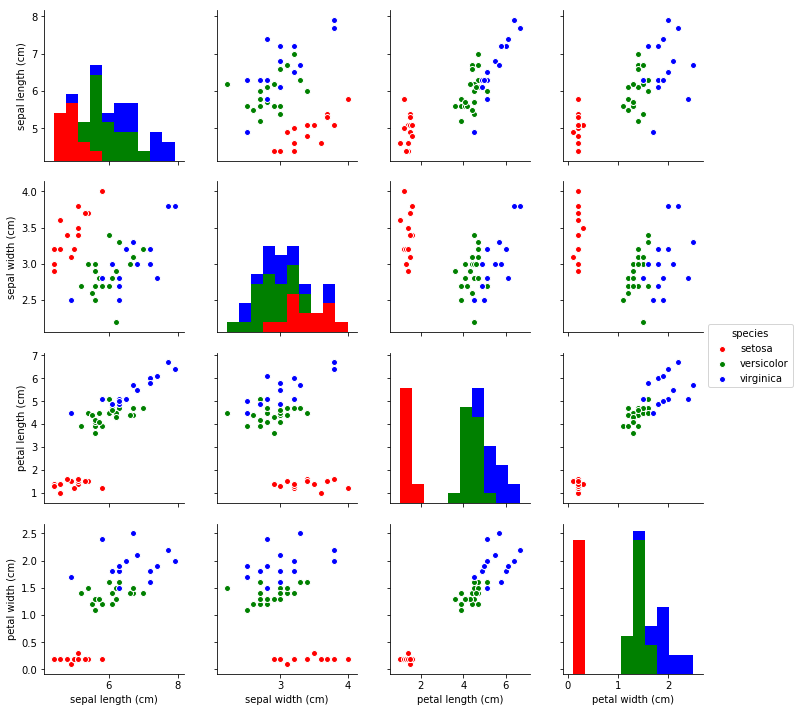

In [9]:
logclass.show(palette=list('rgb'))

## classify things

In [10]:
result = logclass(testing)
result.sample(5)

,class,p_class
58,versicolor,0.750310
31,setosa,0.761998
43,setosa,0.783795
138,virginica,0.539085
44,setosa,0.844310


In [11]:
probs = logclass.probs(testing)
probs.sample(5)

,setosa,versicolor,virginica
79,0.310233,0.688341,0.001426
105,0.010481,0.350105,0.639414
115,0.051027,0.285430,0.663543
148,0.055160,0.242455,0.702385
77,0.073840,0.410701,0.515459


## test with known classes

In [12]:
test1 = logclass.test(testing)
print('Worst predictions:')
test1.nlargest(5,'surprise')

96.0% correct

class       setosa  versicolor  virginica
species                                  
setosa          36           0          0
versicolor       0          27          2
virginica        0           2         34

Worst predictions:


,class,correct,p_class,reality,surprise
119,versicolor,False,0.599751,virginica,1.321032
134,versicolor,False,0.583522,virginica,1.263687
70,virginica,False,0.556621,versicolor,1.173389
77,virginica,False,0.515459,versicolor,1.045309
126,virginica,True,0.522853,virginica,0.935524


## inspect model

In [13]:
print(logclass.model)
logclass.coefs()

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.0,0.248166,-2.053463,0.00000
versicolor,0.0,-0.670955,0.153690,0.00000
virginica,0.0,-0.377604,3.058278,5.91362


## try again with new parameters

In [14]:
logclass.learn(multi_class='multinomial',penalty='l2',solver='lbfgs')
logclass.coefs()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-2.499056,2.095565,-4.642048,-4.653960
versicolor,1.688985,-0.683252,-1.936649,-2.770254
virginica,0.810071,-1.412313,6.578697,7.424215


In [15]:
test2 = logclass.test(testing)
print('Worst predictions:')
test2.nlargest(5,'surprise')

98.0% correct

class       setosa  versicolor  virginica
species                                  
setosa          36           0          0
versicolor       0          27          2
virginica        0           0         36

Worst predictions:


,class,correct,p_class,reality,surprise
70,virginica,False,0.801807,versicolor,2.335022
77,virginica,False,0.662179,versicolor,1.565668
119,virginica,True,0.617368,virginica,0.695797
41,setosa,True,0.707167,setosa,0.499878
72,versicolor,True,0.709422,versicolor,0.495284
